# Dashbord Project Part 3: Prediction

In [22]:
#libraries
#----------------------------------------------
import pandas as pd
from pylab import * 
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt #to plot graphs
import matplotlib.patches as mpatches #to customize legend
import seaborn as sns #to plot graphs
import math 
import re #to find integers & floats in a string 
from statsmodels.graphics.mosaicplot import mosaic #for mosaic plot
from collections import Counter #to count values in a dataframe or array
from datetime import date, timedelta, datetime #for the date
import datetime as dt
import pylab 
import scipy.stats as stats
import statsmodels
import os

# To import missingpy: 
# When importing missingpy it tries to import automatically 'sklearn.neighbors.base' however in the new versions 
# of sklearn it has been renamed to 'sklearn.neighbors._base' so we have to manually import it to work. 
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score

Run: 

1) everythig without satisfactoriness & sentiment analysis (OK 3 labels)\
2) everything without sentiment analysis features (OK 3 labels) \
3) everything without satisfactoriness features (OK 3 labels)\
4) everything (added by me) (OK 3 labels, 2 labels)

Try NN: 4-5 layers 

## File Loading

In [23]:
# File loading. The file must be in the current directory
#---------------------------------------
dfPredC_3 = pd.read_pickle("data/dfPredC_3.pkl") #3 labels
dfPredC_2 = pd.read_pickle("data/dfPredC_2.pkl") #2 labels

#dfPredC_3 = pd.read_excel(os.getcwd() + "\\dfPredC_3.xslx") #3 labels
#dfPredC_2 = pd.read_excel("dfPredC_2.xslx") #2 labels

In [24]:
dfPredC_3.head()

,Student,Marks,module,Year,Supervisor,nbMeetings,worstProgress,meanTimeBetweenMeet,meanTimeMeet,timeFirstDecay,mainSentiment,is0Sentiment
0,4,H4,mcm,2018,17,2,satisfactory,72,NaN,0.0,1.0,False
4,14,H5,mcm,2018,41,1,satisfactory,0,10.000000,0.0,2.0,False
7,66,H5,mcm,2018,27,5,unsatisfactory,29,NaN,176.0,0.0,True
15,79,H5,mcm,2018,5,8,unsatisfactory,21,31.428571,143.0,1.0,True
22,109,N,mcm,2018,45,5,satisfactory,34,NaN,0.0,1.0,False


In [25]:
dfPredC_2.head()

,Student,Marks,module,Year,Supervisor,nbMeetings,worstProgress,meanTimeBetweenMeet,meanTimeMeet,timeFirstDecay,mainSentiment,is0Sentiment
0,4,H4,mcm,2018,17,2,satisfactory,72,NaN,0.0,1.0,False
4,14,H5,mcm,2018,41,1,satisfactory,0,10.000000,0.0,1.0,False
7,66,H5,mcm,2018,27,5,unsatisfactory,29,NaN,176.0,0.0,True
15,79,H5,mcm,2018,5,8,unsatisfactory,21,31.428571,143.0,1.0,True
22,109,N,mcm,2018,45,5,satisfactory,34,NaN,0.0,1.0,False


In [26]:
print("---------\ndfPredC_3:\n---------")
print(dfPredC_3.dtypes)
print("---------\ndfPredC_2:\n---------")
print(dfPredC_2.dtypes)

---------
dfPredC_3:
---------
Student                   int32
Marks                  category
module                 category
Year                      int64
Supervisor                int32
nbMeetings                int64
worstProgress          category
meanTimeBetweenMeet       int64
meanTimeMeet            float64
timeFirstDecay          float64
mainSentiment          category
is0Sentiment           category
dtype: object
---------
dfPredC_2:
---------
Student                   int32
Marks                  category
module                 category
Year                      int64
Supervisor                int32
nbMeetings                int64
worstProgress          category
meanTimeBetweenMeet       int64
meanTimeMeet            float64
timeFirstDecay          float64
mainSentiment          category
is0Sentiment           category
dtype: object


## Create Dummy variables 
To transform categorical variables into real numbers

<font color = 'blue'> **Modify this cell** </font>

In [27]:
#-- 3 labels
dfPredC = dfPredC_3
#-- 2 labels
#dfPredC = dfPredC_2

<font color = 'blue'> **Modify this cell** </font>

In [28]:
### Remove some features from dfPredC if necessary
#------------------------------------------------
# Remove features related to sentiment analysis 
#dfPredC.drop(["mainSentiment","is0Sentiment"],axis=1,inplace = True)
             
# Remove features related to satisfactoriness
#dfPredC.drop(["worstProgress","timeFirstDecay"],axis=1,inplace = True)

# Remove features related to satisfactoriness and sentiment analysis
#dfPredC.drop(["mainSentiment","is0Sentiment","worstProgress","timeFirstDecay"],axis=1,inplace = True)

In [29]:
dfPredC.head()

,Student,Marks,module,Year,Supervisor,nbMeetings,worstProgress,meanTimeBetweenMeet,meanTimeMeet,timeFirstDecay,mainSentiment,is0Sentiment
0,4,H4,mcm,2018,17,2,satisfactory,72,NaN,0.0,1.0,False
4,14,H5,mcm,2018,41,1,satisfactory,0,10.000000,0.0,2.0,False
7,66,H5,mcm,2018,27,5,unsatisfactory,29,NaN,176.0,0.0,True
15,79,H5,mcm,2018,5,8,unsatisfactory,21,31.428571,143.0,1.0,True
22,109,N,mcm,2018,45,5,satisfactory,34,NaN,0.0,1.0,False


In [30]:
y = dfPredC["Marks"] #variable response
X = dfPredC.drop("Marks",axis=1) #explanatory variables

In [31]:
X = pd.get_dummies(X) #create dummy variables
print("number of variables:",np.shape(X)[1])

number of variables: 20


In [32]:
X.head()

,Student,Year,Supervisor,nbMeetings,meanTimeBetweenMeet,meanTimeMeet,timeFirstDecay,module_ca326,module_ca400,module_ca472,module_mcm,module_pnu,worstProgress_moderate,worstProgress_satisfactory,worstProgress_unsatisfactory,mainSentiment_0.0,mainSentiment_1.0,mainSentiment_2.0,is0Sentiment_False,is0Sentiment_True
0,4,2018,17,2,72,NaN,0.0,0,0,0,1,0,0,1,0,0,1,0,1,0
4,14,2018,41,1,0,10.000000,0.0,0,0,0,1,0,0,1,0,0,0,1,1,0
7,66,2018,27,5,29,NaN,176.0,0,0,0,1,0,0,0,1,1,0,0,0,1
15,79,2018,5,8,21,31.428571,143.0,0,0,0,1,0,0,0,1,0,1,0,0,1
22,109,2018,45,5,34,NaN,0.0,0,0,0,1,0,0,1,0,0,1,0,1,0


## Data imputation

- Apparently, the Random Forest algorithm (RF) cannot handle missing (NaN) values. The reason is beacause this RF algorithm is not build on CART trees (which we know can handle missing values) but on other decision trees for computation reasons: https://stats.stackexchange.com/questions/98953/why-doesnt-random-forest-handle-missing-values-in-predictors

- Multinomial logistic regression cannot handle missing values too. 

We need to imput data.\
Tutorial used: https://towardsdatascience.com/how-to-use-python-and-missforest-algorithm-to-impute-missing-data-ed45eb47cb9a

<font color = 'blue'> **Modify this cell** </font>

In [33]:
# Ignore all warnings produced by "MissForest". Those are "future warnings"
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Make an instance and perform the imputation
# For imputation, we can use all explanaroty variables (even columns without mising values)
#---------------------------------------
imputer = MissForest()#data imputation with missForest
#================================
imputer.fit(X,cat_vars = np.arange(6,len(X.columns))) #specify categorical variables 
#================================

X_imp = pd.DataFrame(imputer.transform(X)) 

# Note: the categorical variables need to be one-hot-encoded (also known as dummy encoded)
# and they need to be explicitly identified during the imputer's fit() method call
# documentation: 
# https://github.com/epsilon-machine/missingpy
# https://towardsdatascience.com/how-to-use-python-and-missforest-algorithm-to-impute-missing-data-ed45eb47cb9a

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [34]:
# rename all columns with the correct name:
#---------------------------------------
for i in range(X_imp.shape[1]):
    X_imp.rename(columns = {i:X.columns[i]},inplace=True)
    
# Assign Student IDs to index:
#---------------------------------------
X_imp.index = X_imp.Student #indices are now Student IDs
X_imp.drop("Student",axis=1,inplace=True) #drop Student IDs column

# Assign correct type to data:
#---------------------------------------
X_imp.index= X_imp.index.astype(int)

In [35]:
X_imp.dtypes

Year                            float64
Supervisor                      float64
nbMeetings                      float64
meanTimeBetweenMeet             float64
meanTimeMeet                    float64
timeFirstDecay                  float64
module_ca326                    float64
module_ca400                    float64
module_ca472                    float64
module_mcm                      float64
module_pnu                      float64
worstProgress_moderate          float64
worstProgress_satisfactory      float64
worstProgress_unsatisfactory    float64
mainSentiment_0.0               float64
mainSentiment_1.0               float64
mainSentiment_2.0               float64
is0Sentiment_False              float64
is0Sentiment_True               float64
dtype: object

In [36]:
X_imp.head()

,Year,Supervisor,nbMeetings,meanTimeBetweenMeet,meanTimeMeet,timeFirstDecay,module_ca326,module_ca400,module_ca472,module_mcm,module_pnu,worstProgress_moderate,worstProgress_satisfactory,worstProgress_unsatisfactory,mainSentiment_0.0,mainSentiment_1.0,mainSentiment_2.0,is0Sentiment_False,is0Sentiment_True
Student,,,,,,,,,,,,,,,,,,,
4,2018.0,17.0,2.0,72.0,135.535429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
14,2018.0,41.0,1.0,0.0,10.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
66,2018.0,27.0,5.0,29.0,53.163905,176.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
79,2018.0,5.0,8.0,21.0,31.428571,143.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
109,2018.0,45.0,5.0,34.0,30.316699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Split between train and test set

documentation: https://www.malicksarr.com/split-train-test-validation-python/

In [37]:
# Split dataset between train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, shuffle = True, random_state = 2022)

In [38]:
#print("shape of X_train: {} | shape of y_train: {}".format(X_train.shape,y_train.shape))
#print("shape of X_test:  {} | shape of y_test:  {}".format(X_test.shape,y_test.shape))

## Standardisation

The next step is a data standardisation step. The variables are divided by their standard deviation. This is not useful in the case of an elementary linear model because the solution is the same, but it is essential for many other non-linear methods (SVMs, neural networks, models with penalties). **Note:**, the same parameters (means, standard deviations) estimated on the training sample are used to normalise the test sample. 


*Exemple:* Standardization isn't always required for logistic regression. The main goal of standardizing features is to help convergence of the technique used for optimization. For example, if Newton-Raphson is used to maximize the likelihood, standardizing the features makes the convergence faster. Otherwise, we can run your logistic regression without any standardization treatment on the features. However, if we use Ridge or Lasso regression, we should standardize the data: "The ridge solutions are not equivariant under scaling of the inputs, and so one normally standardizes the inputs before solving".\
(source: https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)

<font color = 'blue'> **Modify this cell** </font>

In [39]:
# Standardisation of explanatory variables
#-----------------------------------------
# store the indices which are the students' IDs
StudentIDs_train = X_train.index
StudentIDs_test = X_test.index
# reset indices to make StandardScaler work
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
# define scaler
scaler = StandardScaler()

# features to standardise
# ====================================
#features = ["nbMeetings","meanTimeBetweenMeet","meanTimeMeet","timeFirstDecay"] #everything & without sentiment
features = ["nbMeetings","meanTimeBetweenMeet","meanTimeMeet"] #without satisfactoriness
# ====================================

# standardise features
scaler.fit(X_train[features]) #fit with the train set only
X_train[features] = scaler.transform(X_train[features]) #apply the fit on the train set...
X_test[features] = scaler.transform(X_test[features])   #...and on the test set

In [40]:
# Re-assign indices to Students' IDs:
#---------------------------------------
X_train.index = StudentIDs_train #indices are now Student IDs
X_test.index = StudentIDs_test #indices are now Student IDs

# Assign correct type to data:
#---------------------------------------
X_train.index= X_train.index.astype(int)
X_test.index= X_test.index.astype(int)

l = ["Year","Supervisor"]
X_train[l]= X_train[l].astype(int)
X_test[l]= X_test[l].astype(int)

#Beware to keep "nbMeetings","meanTimeBetweenMeet","meanTimeMeet","timeFirstDecay" to float 
#since they have been standardised.

In [41]:
# Define multinomial logistic regression model with L2 (Ridge) penalty
#----------------------------------------------
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2') 

# Note:
# "solver": algorithm used in the optimization pb
# "penalty": by default, python's LogisticRegression function applies a L2 (or Ridge) 
# regularisation to select the most important features (= explanatory variables).

In [42]:
# Define the scoring method that will be used in the regression and CV
#----------------------------------------------
#Scoring = 'accuracy' #accuracy is the default score 
Scoring = 'f1_macro' #macroscopic f1-score (better than accuracy)

Which is better **lasso** or **ridge** regression? 

Source: https://www.datacamp.com/tutorial/tutorial-ridge-lasso-elastic-net \
Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). Ridge works well if there are many large parameters of about the same value.

Source: https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/ 
- Limitation of Ridge Regression: Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.


- Limitation of Lasso Regression: Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set). If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data
    
Here, with **multinomial** logistic regression:
- if we want **penality = 'l2'** (Ridge penality) one can use the solver is **'lbfgs'.**
- if we want **penality = 'l1'** (Lasso penality) the only available solver is **'saga'.**

doc: https://github.com/scikit-learn/scikit-learn/issues/8797

### Without feature selection

##### Tune Penalty for Multinomial Logistic Regression

By default, python's LogisticRegression function applies a L2 (or Ridge) regularisation to emphasize the most important features (= explanatory variables). L2 regularisation does not perform features selection since it does not set the coefficients of least important variables to 0 but to almost 0.

We will now optimize the penalty parameter C, which is used in the L2 (Ridge) regression. By defalut, C = 1.0

In [43]:
# Define grid of values for parameter C in L1 (Lasso) regression
param=[{"C":np.arange(.5,2,.05)}] 

# Define and fit GridSearch to find best parameter
GridSearch_LR = GridSearchCV(estimator=model_LR, param_grid=param ,cv=5,n_jobs=-1,scoring = Scoring)  #by defalut, the score is sklearn.metrics.accuracy_score, here we use the variable Scoring.
LR_params = GridSearch_LR.fit(X_train, y_train)

# Display optimal parameter
print("Best " + Scoring + " score = %f, Best parameter = %s" % (LR_params.best_score_,LR_params.best_params_))
      #best_params_= parameter setting that gave the best results on the hold out data
      #best_score_= mean cross-validated score of the best_estimator

Best f1_macro score = 0.139362, Best parameter = {'C': 0.55}


In [44]:
# Redefine the multinomial logistic regression model with best parameter
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2',C = LR_params.best_params_["C"]) 

#####  Cross-Validation Error

In [45]:
# Define the model evaluation procedure with CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022) #n_repeats=3 CV repeats with n_splits=10 folds

# Evaluate the model and collect the scores
n_scores_LR = cross_val_score(model_LR, X_train, y_train, scoring=Scoring, cv=cv, n_jobs=-1,error_score='raise')

# Report the model performance
print("============= Model performance =============")
print('CV error: mean ' + Scoring + '=%.3f (std=%.3f)' % (mean(n_scores_LR), std(n_scores_LR)))
print("=============================================")
# this is the mean classification accuracy across all folds and repeats of the evaluation procedure.

============= Model performance =============
CV error: mean f1_macro=0.139 (std=0.024)


### With feature selection

For feature selection, there is no global agreement but it may be better to do in the following order:
1) Select features: select the most important explanatory variables to obtain a reduced model

2) Optimise hyperparameters on the reduced model

documentation: https://stats.stackexchange.com/questions/264533/how-should-feature-selection-and-hyperparameter-optimization-be-ordered-in-the-m

#### Select feature with regularisation L1 (LASSO)

L1 (or Lasso) regularisation to select the most important features (= explanatory variables) since it sets the coefficients of least important variables to 0. 

In [46]:
# Define multinomial logistic regression model with L1 (Lasso) penalty 
# which carries out a feature selection
#--------------------------------------------
model_LR_lasso = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1') 

##### Tune Penalty for Multinomial Logistic Regression

In [47]:
# Define grid of values for parameter C in L1 (Lasso) regression
param=[{"C":np.arange(0.1,2,.05)}]

# Define and fit GridSearch
GridSearch_LR_lasso = GridSearchCV(estimator=model_LR_lasso, param_grid=param ,cv=5,n_jobs=-1,scoring = Scoring)  #by defalut, the score is sklearn.metrics.accuracy_score, here we use the variable Scoring.
LR_lasso_params = GridSearch_LR_lasso.fit(X_train, y_train)

# Display optimal parameter
print("Best " + Scoring + " score = %f, Best parameter = %s" % (LR_lasso_params.best_score_,LR_lasso_params.best_params_))
      #best_params_= parameter setting that gave the best results on the hold out data
      #best_score_= mean cross-validated score of the best_estimator

Best f1_macro score = 0.135637, Best parameter = {'C': 1.8500000000000008}


In [48]:
# Redefine the multinomial logistic regression model with best parameters
model_LR_lasso = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1',C = LR_lasso_params.best_params_["C"])

##### Display selected features

In [49]:
# "GridSearch" does not store the coefficients, they need to be re-estimated:
Coef_lasso = model_LR_lasso.fit(X_train,y_train).coef_  #coef_: array of shape (n_classes, n_features) containing the coefficient of the features in the decision function
Coef_lasso = pd.Series(Coef_lasso[0], index = X_train.columns)

print("Lasso regression keeps {} explanatory variables out of {} and removes {} variables."
      .format(sum(Coef_lasso != 0) , X_train.shape[1], sum(Coef_lasso == 0)))
print()
print("Selected variables:")
print(Coef_lasso.index[Coef_lasso!= 0])

Lasso regression keeps 12 explanatory variables out of 19 and removes 7 variables.

Selected variables:
Index(['Year', 'Supervisor', 'meanTimeBetweenMeet', 'timeFirstDecay',
       'module_ca326', 'module_ca400', 'module_ca472',
       'worstProgress_moderate', 'worstProgress_satisfactory',
       'mainSentiment_1.0', 'is0Sentiment_False', 'is0Sentiment_True'],
      dtype='object')


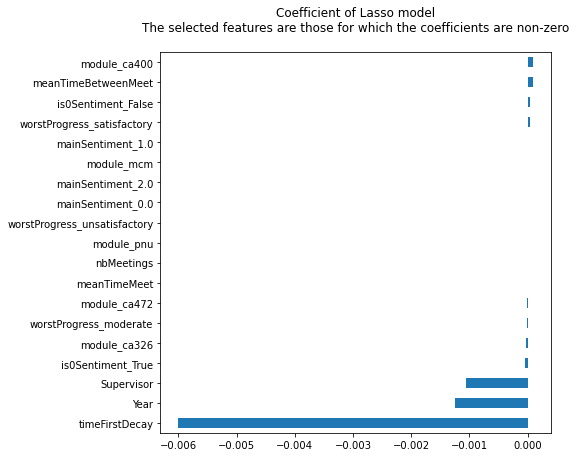

In [50]:
# plot of the selected features
#-----------------------------------------
f, ax = plt.subplots(figsize=(7,7))
imp_coef = Coef_lasso.sort_values()
imp_coef.plot(kind = "barh")
plt.title(u"Coefficient of Lasso model\n"
          +"The selected features are those for which the coefficients are non-zero\n")
plt.show()

The array "coeff_" contains the coefficients found for each input variable. These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

#####  Cross-Validation Error

In [51]:
# Define the model evaluation procedure with CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022) #n_repeats=3 CV repeats with n_splits=10 folds

# Evaluate the model and collect the scores
n_scores_lasso = cross_val_score(model_LR_lasso, X_train, y_train, scoring=Scoring, cv=cv, n_jobs=-1,error_score='raise')

# Report the model performance
print("============= Model performance =============")
print('CV error: mean ' + Scoring + '=%.3f (std=%.3f)' % (mean(n_scores_lasso), std(n_scores_lasso)))
print("=============================================")
# this is the mean classification accuracy across all folds and repeats of the evaluation procedure.

============= Model performance =============
CV error: mean f1_macro=0.129 (std=0.024)


#### Select feature with RFE

documentation:
- https://scikit-learn.org/stable/modules/feature_selection.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

tutorial: 
- https://machinelearningmastery.com/rfe-feature-selection-in-python/

RFE (`sklearn.feature_selection.RFE`) select features based on how they affect a particular model’s performance. RFE needs to be given the number of features to select.

It is possible to automatically select the number of features chosen by RFE. This can be achieved by performing cross-validation evaluation of different numbers of features and automatically selecting the number of features that resulted in the best mean score. The RFECV class implements this for us.


In [52]:
# Define multinomial logistic regression model with L2 (Ridge) penalty
#----------------------------------------------
model_LR_rfe = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none') 

##### Find and display selected features

In [53]:
# Automatically Select the Number of Features using RFECV 
#----------------------------------------------
# create pipeline
rfe = RFECV(estimator=model_LR_rfe)
model = model_LR_rfe
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring=Scoring, cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(Scoring + ': %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

f1_macro: 0.163 (0.044)


In [54]:
# Print out the  selected features in order of ranking
#------------------------------------------
rfe.fit(X_train, y_train)
from operator import itemgetter
features = np.array(X_train.columns.to_list())
print("Features in order of ranking:")
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
print("-----------------------------------")
print("The selected {} features are:\n{}".format(rfe.n_features_,features[rfe.support_]))

Features in order of ranking:
1 Year
1 Supervisor
1 nbMeetings
1 timeFirstDecay
2 meanTimeBetweenMeet
3 meanTimeMeet
4 module_mcm
5 worstProgress_satisfactory
6 mainSentiment_1.0
7 module_ca400
8 worstProgress_unsatisfactory
9 module_pnu
10 is0Sentiment_False
11 worstProgress_moderate
12 mainSentiment_0.0
13 module_ca472
14 module_ca326
15 mainSentiment_2.0
16 is0Sentiment_True
-----------------------------------
The selected 4 features are:
['Year' 'Supervisor' 'nbMeetings' 'timeFirstDecay']


In [ ]:
# Redefine X_train & X_test with only the selected features
#------------------------------------------
X_train_rfe = X_train[features[rfe.support_]]
X_test_rfe = X_test[features[rfe.support_]]

In [ ]:
X_train_rfe.head()

#####  Cross-Validation Error

In [ ]:
# Define the model evaluation procedure with CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022) #n_repeats=3 CV repeats with n_splits=10 folds

# Evaluate the model and collect the scores
n_scores_rfe = cross_val_score(model_LR_rfe, X_train_rfe, y_train, scoring=Scoring, cv=cv, n_jobs=-1,error_score='raise')

# Report the model performance
print("============= Model performance =============")
print('CV error: mean ' + Scoring + '=%.3f (std=%.3f)' % (mean(n_scores_rfe), std(n_scores_rfe)))
print("=============================================")
# this is the mean classification accuracy across all folds and repeats of the evaluation procedure.

## Neural Network

There are several python libraries for neural networks (Scikit-learn,TensorFlow,PyTorch,Keras). We will use Scikit-learn, which is less powerful but simpler to implement.

tutorial: https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

**How many hidden layers and neurons in that hidden layer?** \
For most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: 

**Rule 1**: The number of hidden layers = 1 or 2;
 
- 0 - Only capable of representing linear separable functions or decisions.

- 1 - Can approximate any function that contains a continuous mapping
from one finite space to another.

- 2 - Can represent an arbitrary decision boundary to arbitrary accuracy
with rational activation functions and can approximate any smooth
mapping to any accuracy.

**Rule 2**: There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- a. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- b. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- c. The number of hidden neurons should be less than twice the size of the input layer.
- d. The number of hidden neurons should be the mean of the neurons in the input and output layers. 

And we have: 
- number of neurons in the input layer = number of features (columns) in our data = 19 
- number of neurons in the output layer = 1 single neuron unless softmax is used in which case the output layer has one neuron per class label in our model. Apparently, with MLPClassifier method from Scikit-learn, the softmax function is already used.


Therefore, we will use as a first guess **2 hidden layers** with **14 neurons** (rule 2.b) and **10 neurons** (rule 2.d). 



source: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw (very good explanation with references. Read all page).

In [ ]:
# Initialisation of a first neural network 
#------------------------------------------
model_nn = MLPClassifier(hidden_layer_sizes=(14,10),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
#hidden_layer_sizes: default value is (100,) which means 1 input layer, 
#1 hidden layer with 100 neurons and 1 output layer.

### Without feature selection

##### Tune neural network parameters
<font color = "red"> **Beware:** the cell below is long to run </font>

In [ ]:
# Define grid of values for parameters the neural network
# After several runs, the grid of values has been adapted to find the best parameters
param = {
    'hidden_layer_sizes': [(14,4),(14,6),(14,5),(16,5),(16,6)], 
    'alpha': np.arange(0.001,1,0.05),
    'learning_rate': ['constant','adaptive'],
}

# Define and fit GridSearch
GridSearch_nn = GridSearchCV(estimator=model_nn, param_grid=param,cv=5, n_jobs= -1,scoring = Scoring)
params_nn = GridSearch_nn.fit(X_train, y_train)

In [ ]:
# Display optimal parameter
print("Best " + Scoring + " score = %f, Best parameters = %s" % (params_nn.best_score_,params_nn.best_params_))
    #best_params_= parameter setting that gave the best results on the hold out data
    #best_score_= mean cross-validated score of the best_estimator

In [ ]:
# Redefine the neural network with best parameters
model_nn = MLPClassifier(hidden_layer_sizes= params_nn.best_params_["hidden_layer_sizes"],
                        alpha = params_nn.best_params_["alpha"],
                        learning_rate = params_nn.best_params_["learning_rate"],
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

#####  Cross-Validation Error

In [ ]:
# Define the model evaluation procedure with CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022) #n_repeats=3 CV repeats with n_splits=10 folds

# Evaluate the model and collect the scores
n_scores_nn = cross_val_score(model_nn, X_train, y_train, scoring=Scoring, cv=cv, n_jobs=-1,error_score='raise')

# Report the model performance
print("============= Model performance =============")
print('CV error: mean ' + Scoring + '=%.3f (std=%.3f)' % (mean(n_scores_nn), std(n_scores_nn)))
print("=============================================")
# this is the mean classification accuracy across all folds and repeats of the evaluation procedure.

#### Select feature with SFS


Since the neural network does not give specific attributes of importance such as `coef_` or `feature_importances_` we cannot use `RFE` (`sklearn.feature_selection.RFE`). Intead, we will use `SFS` (`sklearn.feature_selection.SequentialFeatureSelector`). SFS differs from RFE and SelectFromModel in that it does not require the underlying model to expose a coef_ or feature_importances_ attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches

source:
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector

Unlike RFE using RFECV, there is no method to automatically determine the number of features. We will start with **10 features** here since **8 features** where previously selected in the case of logistic multinomial regression. 

In [ ]:
# Define a new neural network 
#----------------------------------------------
model_nn_sfs = MLPClassifier(hidden_layer_sizes=(14,10),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

##### Find and display selected features
<font color = "red"> **Beware:** the cell below is long to run </font>

<font color = 'blue'> **Modify this cell** </font>

In [ ]:
# Feature selection with SFS
#------------------------------------------
sfs = SequentialFeatureSelector(estimator = model_nn_sfs, 
                                n_features_to_select=6,
                                direction='backward',
                               scoring = Scoring,
                               cv=5,
                               n_jobs=-1)
sfs.fit(X_train, y_train) #Learn the features to select from X_train.

In [ ]:
# Print out the  selected features in order of ranking
#------------------------------------------
print("Features selected by the SFS method:\n")
print(sfs.get_feature_names_out())

In [ ]:
# Redefine X_train and X_test with only the selected features
#------------------------------------------
X_train_sfs = X_train[sfs.get_feature_names_out()]
X_test_sfs = X_test[sfs.get_feature_names_out()]

In [ ]:
X_train_sfs.head()

##### Tune neural network parameters
<font color = "red"> **Beware:** the cell below is long to run </font>

In [ ]:
# Define grid of values for parameters the neural network
# After several runs, the grid of values has been adapted to find the best parameters
param = {
    'hidden_layer_sizes': [(14,4),(14,6),(16,6),(16,10),(16,14)], 
    'alpha': np.arange(0.001,1,0.05),
    'learning_rate': ['constant','adaptive'],
}

# Define and fit GridSearch
GridSearch_nn_sfs = GridSearchCV(estimator=model_nn_sfs, param_grid=param,cv=5, n_jobs= -1,scoring = Scoring)
params_nn_sfs = GridSearch_nn_sfs.fit(X_train_sfs, y_train) #use only SELECTED FEATURES by sfs in X_train

In [ ]:
# Display optimal parameter
print("Best " + Scoring + " score = %f, Best parameter = %s" % (params_nn_sfs.best_score_,params_nn_sfs.best_params_))
    #best_params_= parameter setting that gave the best results on the hold out data
    #best_score_= mean cross-validated score of the best_estimator

In [ ]:
# Redefine the neural network with best parameters
model_nn_sfs = MLPClassifier(hidden_layer_sizes= params_nn_sfs.best_params_["hidden_layer_sizes"],
                        alpha = params_nn_sfs.best_params_["alpha"],
                        learning_rate = params_nn_sfs.best_params_["learning_rate"],
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

#####  Cross-Validation Error

In [ ]:
# Define the model evaluation procedure with CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022) #n_repeats=3 CV repeats with n_splits=10 folds

# Evaluate the model and collect the scores
n_scores_sfs = cross_val_score(model_nn_sfs, X_train_sfs, y_train, scoring=Scoring, cv=cv, n_jobs=-1,error_score='raise')


# Report the model performance
print("============= Model =============")
print('CV error: mean ' + Scoring + '=%.3f (std=%.3f)' % (mean(n_scores_sfs), std(n_scores_sfs)))
print("=============================================")
# this is the mean classification accuracy across all folds and repeats of the evaluation procedure.

### Compute predictions on the test set

In [ ]:
# Create a dataFrame to store the results on the test set
#---------------------------------------------------
dfResult = pd.DataFrame(y_test)
dfResult.rename(columns={"Marks": "trueLabel"},inplace=True)

In [ ]:
# Multinomial Logistic Regression 
#---------------------------------------------------
#----- Without feature selection
model_LR.fit(X_train, y_train) #fit the model on the whole dataset
pred_LR = model_LR.predict(X_test) #compute predictions on the test set
dfResult["mlr"] = pred_LR #add prediction to dataFrame

#----- With feature selection using Lasso
model_LR_lasso.fit(X_train,y_train) #fit the model on the whole dataset
pred_LR_lasso= model_LR_lasso.predict(X_test) #compute predictions on the test set
dfResult["mlr_lasso"] = pred_LR_lasso #add prediction to dataFrame

#----- With feature selection using RFE
model_LR_rfe.fit(X_train_rfe,y_train) #fit the model on the selected features 
pred_LR_rfe= model_LR_rfe.predict(X_test_rfe) #compute predictions on the test set
dfResult["mlr_rfe"] = pred_LR_rfe #add prediction to dataFrame

In [ ]:
# Neural Network 
#---------------------------------------------------
#----- Without feature selection
model_nn.fit(X_train, y_train) #fit the model on the whole dataset
pred_nn = model_nn.predict(X_test) #compute predictions on the test set
dfResult["nn"] = pred_nn #add prediction to dataFrame

#----- With feature selection using SFS
model_nn_sfs.fit(X_train_sfs,y_train) #fit the model on the selected features 
pred_nn_sfs= model_nn_sfs.predict(X_test_sfs) #compute predictions on the test set
dfResult["nn_sfs"] = pred_nn_sfs #add prediction to dataFrame

In [ ]:
dfResult.head()

### Contigency Tables

In [ ]:
print("Contigency Tables")
print()

print("-------------------------------")
print("Multinomial Logistic Regression without feature selection")
print("-------------------------------")
print(pd.crosstab(index=dfResult["trueLabel"], columns=dfResult["mlr"]))
print()

print("-------------------------------")
print("Multinomial Logistic Regression feature selection with Lasso")
print("-------------------------------")
print(pd.crosstab(index=dfResult["trueLabel"], columns=dfResult["mlr_lasso"]))
print()

print("-------------------------------")
print("Multinomial Logistic Regression feature selection with RFE")
print("-------------------------------")
print(pd.crosstab(index=dfResult["trueLabel"], columns=dfResult["mlr_rfe"]))
print()

print("-------------------------------")
print("Neural Network without feature selection")
print("-------------------------------")
print(pd.crosstab(index=dfResult["trueLabel"], columns=dfResult["nn"]))
print()

print("-------------------------------")
print("Neural Network feature selection with SFS")
print("-------------------------------")
print(pd.crosstab(index=dfResult["trueLabel"], columns=dfResult["nn_sfs"]))
print()

### F1-scores

In [ ]:
print("F1-Scores")
print()

print("-------------------------------")
print("Multinomial Logistic Regression without feature selection")
print("-------------------------------")
print(f1_score(dfResult["trueLabel"], dfResult["mlr"],average='macro'))
print()

print("-------------------------------")
print("Multinomial Logistic Regression feature selection with Lasso")
print("-------------------------------")
print(f1_score(dfResult["trueLabel"], dfResult["mlr_lasso"],average='macro'))
print()

print("-------------------------------")
print("Multinomial Logistic Regression feature selection with RFE")
print("-------------------------------")
print(f1_score(dfResult["trueLabel"], dfResult["mlr_rfe"],average='macro'))
print()

print("-------------------------------")
print("Neural Network without feature selection")
print("-------------------------------")
print(f1_score(dfResult["trueLabel"], dfResult["nn"],average='macro'))
print()

print("-------------------------------")
print("Neural Network feature selection with SFS")
print("-------------------------------")
print(f1_score(dfResult["trueLabel"], dfResult["nn_sfs"],average='macro'))
print()

### Accuracy

In [ ]:
print("Accuracy")
print()

print("-------------------------------")
print("Multinomial Logistic Regression without feature selection")
print("-------------------------------")
print(accuracy_score(dfResult["trueLabel"], dfResult["mlr"]))
print()

print("-------------------------------")
print("Multinomial Logistic Regression feature selection with Lasso")
print("-------------------------------")
print(accuracy_score(dfResult["trueLabel"], dfResult["mlr_lasso"]))
print()

print("-------------------------------")
print("Multinomial Logistic Regression feature selection with RFE")
print("-------------------------------")
print(accuracy_score(dfResult["trueLabel"], dfResult["mlr_rfe"]))
print()

print("-------------------------------")
print("Neural Network without feature selection")
print("-------------------------------")
print(accuracy_score(dfResult["trueLabel"], dfResult["nn"]))
print()

print("-------------------------------")
print("Neural Network feature selection with SFS")
print("-------------------------------")
print(accuracy_score(dfResult["trueLabel"], dfResult["nn_sfs"]))
print()

### Drafts and unfinished codes

In [ ]:
# Explore the number of features du select 
# Get a list of models to evaluate
def get_models(model):
    models = dict()
    for i in range(2, 19):
        rfe = RFE(estimator=model, n_features_to_select=i)
        model = model
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# Evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring=Scoring, cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# get the models to evaluate
models = get_models(model_LR)
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(name + ' features -> CV error: mean ' + Scoring + '={} (std={})'
          .format(round(mean(scores),3), round(std(scores),3)))

# plot model performance for comparison
#-----------------------------------------------------
f, ax = plt.subplots(figsize=(15,7))
ax.set_title("Bloxplot of the distribution of " + Scoring +" scores for each configured number of features")
ax.set_xlabel("number of features")
ax.set_ylabel("distribution of " + Scoring +" scores")
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Perform a scikit-learn Recursive Feature Elimination (RFE)
#------------------------------------------
RFE_selector = RFE(model_LR, n_features_to_select=6, step=1) #step=1: nb of features to remove at each iteration
RFE_selector = RFE_selector.fit(X_train, y_train)
#print(RFE_selector.support_)
#print(RFE_selector.ranking_)


# Now print out the features in order of ranking
#------------------------------------------
from operator import itemgetter
features = np.array(X_train.columns.to_list())
print("Features in order of ranking:")
for x, y in (sorted(zip(RFE_selector.ranking_ , features), key=itemgetter(0))):
    print(x, y)
print("-----------------------------------")
print("The selected {} features are:\n{}".format(RFE_selector.n_features_,features[RFE_selector.support_]))